# Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx
import numpy as np

G = nx.Graph()

By definition, a **Graph** is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

# Nodes
The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [2]:
G.add_node(1)

add a list of nodes,

In [3]:
G.add_nodes_from([2, 3])

or add any iterable container of nodes. You can also add nodes along with node attributes if your container yields 2-tuples (node, node_attribute_dict). Node attributes are discussed further below.

In [4]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Note that G now contains the nodes of H as nodes of G. 

# Edges
G can also be grown by adding one edge at a time,

In [5]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [6]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415}). Edge attributes are discussed further below

In [7]:
G.add_edges_from(H.edges)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [8]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [9]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph G consists of 8 nodes and 3 edges, as can be seen by:

In [10]:
print G.number_of_nodes()
print G.number_of_edges()

8
3


We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. 

In [11]:
print list(G.nodes)
print list(G.edges)
print list(G.adj[1])  # or list(G.neighbors(1))
print G.degree[1]  # the number of edges incident to 1

['a', 1, 2, 3, 'spam', 'm', 'p', 's']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from()

In [12]:
G.remove_node(2)
G.remove_nodes_from("spam")
print list(G.nodes)
G.remove_edge(1, 3)
print list(G.edges)

[1, 3, 'spam']
[]


# Drawing a graph
NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

In [13]:
import matplotlib.pyplot as plt
G = nx.petersen_graph() # create a graph
plt.plot()
nx.draw(G, with_labels=True, font_weight='bold')

# Adding attributes to nodes and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to nodes or edges.

Each node and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.nodes and G.edges for a graph G.

Add node attributes using add_node(), add_nodes_from(), or G.nodes

In [14]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print G.nodes[1]
G.nodes[1]['room'] = 714
print G.nodes.data()

{'time': '5pm'}
[(0, {}), (1, {'room': 714, 'time': '5pm'}), (2, {}), (3, {'time': '2pm'}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


Note that adding a node to G.nodes does not add it to the graph, use G.add_node() to add new nodes. Similarly for edges.

Add/change edge attributes using add_edge(), add_edges_from(), or subscript notation.

In [15]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print G.edges.data()

[(0, 1, {}), (0, 4, {}), (0, 5, {}), (1, 2, {'color': 'blue', 'weight': 4.7}), (1, 6, {}), (2, 3, {'weight': 8}), (2, 7, {}), (3, 8, {}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 9, {}), (4, 5, {'color': 'red'}), (5, 8, {}), (5, 7, {}), (6, 8, {}), (6, 9, {}), (7, 9, {})]


The special attribute weight should be numeric as it is used by algorithms requiring weighted edges.

# Directed graphs
The DiGraph class provides additional properties specific to directed edges, e.g., DiGraph.out_edges(), DiGraph.in_degree(), DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

In [16]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print DG.out_degree(1, weight='weight')
print DG.degree(1, weight='weight')
print list(DG.successors(1))
print list(DG.neighbors(1))

0.5
1.25
[2]
[2]


Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using Graph.to_undirected() or with

In [17]:
H = nx.Graph(G)  # convert G to undirected graph

# Loading graphs
One can load a graph stored in a file using common graph formats, such as edge lists, adjacency lists, 

In [18]:
import pandas as pd
df = pd.read_csv("lesmis.csv")
df.head()

,1,2
0,2,3
1,2,4
2,2,5
3,2,6
4,2,7


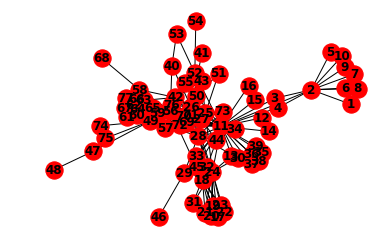

In [19]:
G=nx.read_edgelist("lesmis.csv",delimiter=',')
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold')

# Generating graphs
1. Using a call to one of the classic small graphs, e.g., G = nx.karate_club_graph()

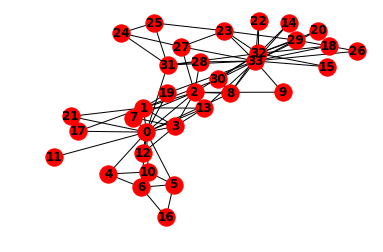

In [20]:
G = nx.karate_club_graph()
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold')

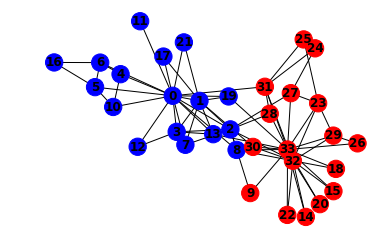

In [21]:
# Set the color of each node based on its attribute value
node_color_club = []

for node in G.nodes(data=True):

    # if the node has the attribute group1
    if 'Mr. Hi' in node[1]['club']:
        node_color_club.append('blue')
        
    if 'Officer' in node[1]['club']:
        node_color_club.append('red')        
        
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_club)

2. Using a stochastic graph generator, e.g.,nx.erdos_renyi_graph(100, 0.15)

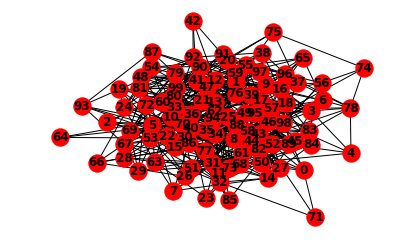

In [22]:
# Create a random graph with 100 nodes
# Each pair of nodes is connected with prob 0.05
G = nx.erdos_renyi_graph(100, 0.1)
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold')

# Saving Graphs
One can save graphs in a file using common graph formats, such as edge lists, adjacency lists, 

In [23]:
nx.write_edgelist(G, "random.csv", delimiter=',')
df = pd.read_csv("random.csv")
df.head()

,0,71,{}
0,0,8,{}
1,0,9,{}
2,0,43,{}
3,0,22,{}
4,0,89,{}


# 1.a Ranking: PageRank
-------------------------------------------
    pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None
-------------------------------------------
* Return the PageRank of the nodes in the graph.
* PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

* ### Parameters:	
 1. G (graph) – A NetworkX graph. Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge.
 2. alpha (float, optional) – Damping parameter for PageRank, default=0.85.
 3. personalization (dict, optional) – The “personalization vector” consisting of a dictionary with a key for every graph node and nonzero personalization value for each node. By default, a uniform distribution is used.
 4. max_iter (integer, optional) – Maximum number of iterations in power method eigenvalue solver.
 5. tol (float, optional) – Error tolerance used to check convergence in power method solver.
 6. nstart (dictionary, optional) – Starting value of PageRank iteration for each node.
 7. weight (key, optional) – Edge data key to use as weight. If None weights are set to 1.
 8. dangling (dict, optional) – The outedges to be assigned to any “dangling” nodes, i.e., nodes without any outedges. The dict key is the node the outedge points to and the dict value is the weight of that outedge. By default, dangling nodes are given outedges according to the personalization vector (uniform if not specified). This must be selected to result in an irreducible transition matrix (see notes under google_matrix). It may be common to have the dangling dict to be the same as the personalization dict.

* ### Returns:	
pagerank – Dictionary of nodes with PageRank as value

* ### Return type:	
dictionary

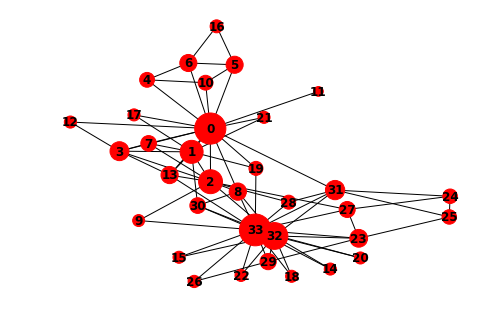

In [24]:
G = nx.karate_club_graph()
pr = nx.pagerank(G)

# Set the size of each node proportional to its page rank
node_size = [0] * G.number_of_nodes()

index = 0
for node in G.nodes(data=True):
    node_size[index] = pr[node[0]] * 10000;
    index += 1

nx.draw_spring(G, with_labels=True, font_weight='bold', node_size=node_size)

# 1.b Ranking: Closeness Centrality
-------------------------------------------
    closeness_centrality(G, u=None, distance=None, normalized=True)
-------------------------------------------
* Compute closeness centrality for nodes.
* Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1.

\begin{equation*}
C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},
\end{equation*}

* where $d(v, u)$ is the shortest-path distance between v and u, and n is the number of nodes in the graph.

* Notice that higher values of closeness indicate higher centrality.

* Parameters:
 1. G (graph) – A NetworkX graph
 2. u (node, optional) – Return only the value for node u
 3. distance (edge attribute key, optional (default=None)) – Use the specified edge attribute as the edge distance in shortest path calculations
 4. normalized (bool, optional) – If True (default) normalize by the number of nodes in the connected part of the graph.

* Returns:
 * nodes – Dictionary of nodes with closeness centrality as the value.

* Return type:
 * dictionary

# (QUIZ #1) Closeness Centrality

1. Read the graph stored in "lesmis.csv" in the edge list format.
2. Compute the closeeness centrality of each node.
3. Visualize the graph so that the color of each node $u$ is $C_{u} \times 1000$


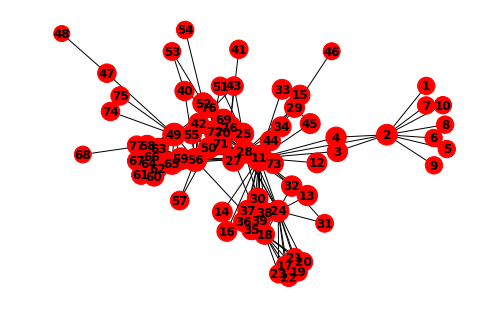

In [25]:
from networkx.algorithms.centrality import closeness_centrality

# 1. Read the graph stored in "lesmis.csv" in the edge list format.
G=nx.read_edgelist("lesmis.csv",delimiter=',')

# 2. Compute the closeeness centrality of each node.
pr = closeness_centrality(G)

#3. Visualize the graph so that the size of each node $u$ is $C_{u} \times 1000$
node_size = [0] * G.number_of_nodes()
index = 0
for node in G.nodes(data=True):
    node_size[index] = pr[node[0]] * 1000;
    index += 1

nx.draw_spring(G, with_labels=True, font_weight='bold', node_size=node_size)

# 2.a Communicty Detection: Greedy
-------------------------------------------
    greedy_modularity_communities(G, weight=None)
-------------------------------------------
* Find communities in graph using Clauset-Newman-Moore greedy modularity maximization. This method currently supports the Graph class and does not consider edge weights.
* Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

* ### Parameters:	
 1. G (NetworkX graph)

* ### Returns:	
Yields sets of nodes, one for each community.

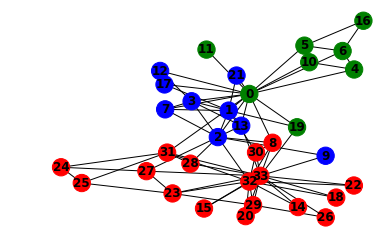

In [26]:
from networkx.algorithms.community import greedy_modularity_communities

np.random.seed(0)

G = nx.karate_club_graph()
communities = list(greedy_modularity_communities(G))

# Set the color of each node based on the community it belongs
node_color_community = [0] * G.number_of_nodes()

colors = ['red','blue','green','purple']
for i in range(len(communities)):
    for node in communities[i]:
        node_color_community[node] = colors[i];      
        
plt.plot()
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_community)

# 2.b Communicty Detection: Bipartition
-------------------------------------------
    kernighan_lin_bisection(G, partition=None, max_iter=10, weight='weight', seed=None)
-------------------------------------------
* Partition a graph into two blocks using the Kernighan–Lin algorithm.
* This algorithm paritions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets.

* ### Parameters:
 1. G (graph)
 2. partition (tuple) – Pair of iterables containing an initial partition. If not specified, a random balanced partition is used.
 3. max_iter (int) – Maximum number of times to attempt swaps to find an improvemement before giving up.
 4. weight (key) – Edge data key to use as weight. If None, the weights are all set to one.
 5. seed (integer, random_state, or None (default)) – Indicator of random number generation state. See Randomness. Only used if partition is None
    

* ### Returns:
partition – A pair of sets of nodes representing the bipartition.

* ### Return type:
tuple

# (QUIZ #2) Bipartition

1. Create graph G using nx.karate_club_graph()
2. Partition G into two blocks uing kernighan_lin_bisection()
3. Visualize the graph so that the colors of the nodes in the each partition are the same.

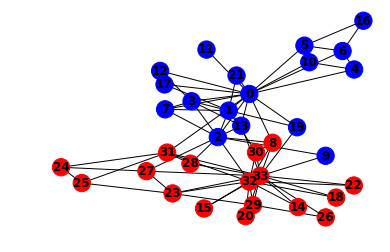

In [27]:
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

# 1. Create graph G using nx.karate_club_graph()
G = nx.karate_club_graph()

# 2. Partition G into two blocks uing kernighan_lin_bisection()
communities = kernighan_lin_bisection(G)

# 3. Visualize the graph so that the colors of the nodes in the each partition are the same.
colors = ['blue','red']
node_color_partition = [0] * G.number_of_nodes()

for i in range(len(communities)):
    for node in communities[i]:
        node_color_partition[node] = colors[i];    

plt.plot()

np.random.seed(0)
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color=node_color_partition)

Comapre the partition to the partion obtained by the clubs that the nodes belong to

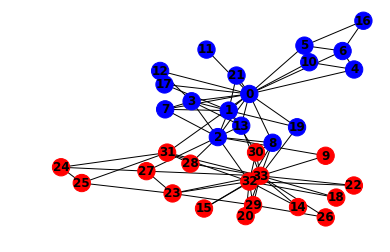

In [28]:
plt.plot()
np.random.seed(0)
nx.draw(G, with_labels=True, font_weight='bold', node_color=node_color_club)

Note that the partition given by kernighan_lin_bisection() is very close to the partition of nodes by the clubs that they belong to.

# 3.a Dimensionality Reduction (Node Embedding): SVD
-----------------------------------
GIven a graph G, we compute the latent features of nodes using (truncated) SVD as follows:
1. Obtain the adjacency matrix A of G using adjacency_matrix()
2. Run truncated SVD using A with rank k
3. Obtain the k features of nodes that minimize the "reconstruction error"
-----------------------------------
    sklearn.decomposition.TruncatedSVD(n_components=2, algorithm=’randomized’, n_iter=5, random_state=None, tol=0.0)
-----------------------------------   
* Dimensionality reduction using truncated SVD (aka LSA). This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently. In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

* ### Parameters (subset):	
 * n_components : int, default = 2. Desired dimensionality of output data. Must be strictly less than the number of features. The default value is useful for visualisation. For LSA, a value of 100 is recommended.

* ### Attributes (subset):	
 * components_ : array, shape (n_components, n_features). explained_variance_ : array, shape (n_components,) The variance of the training samples transformed by a projection to each component.

* ### Methods (subset):	
 * fit(self, X[, y])	Fit LSI model on training data X.
 * fit_transform(self, X[, y])	Fit LSI model to X and perform dimensionality reduction on X.

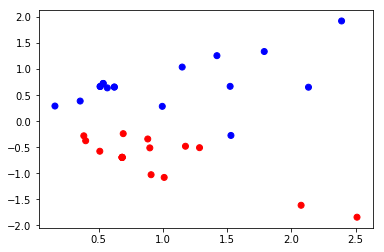

In [29]:
from sklearn.decomposition import TruncatedSVD

G = nx.karate_club_graph()

# Obtain the adjacency matrix A of G using adjacency_matrix()
A = nx.adjacency_matrix(G) 

# Run truncated SVD using A with rank k
# Obtain the k features of nodes that minimize the "reconstruction error" 
svd = TruncatedSVD(n_components=2);
X = svd.fit_transform(A);

# Plot the result so that the color of each node indicates the club it belongs to 
plt.scatter(X[:,0], X[:,1], c= node_color_club)

We can run any off-the-shelf classification and clustering methods using the obtained node features. 

# 3.b Dimensionality Reduction (Node Embedding): MDS
-----------------------------------
GIven a graph G, we compute the latent features of nodes using MDS as follows:
1. Obtain the distance matrix D of nodes in G using shortest_path_length()
2. Run MDS using D with rank k
3. Obtain the k features of nodes that prserve the distance
-----------------------------------
    shortest_path_length(G, source=None, target=None, weight=None)
-----------------------------------  
* Compute shortest path lengths in the graph.

* ### Parameters :	
 1. G : NetworkX graph
 2. source : node, optional. Starting node for path. If not specified, compute shortest path lengths using all nodes as source nodes.
 3. target : node, optional. Ending node for path. If not specified, compute shortest path lengths using all nodes as target nodes.
 4. weight : None or string, optional (default = None) If None, every edge has weight/distance/cost 1. If a string, use this edge attribute as the edge weight. Any edge attribute not present defaults to 1.

* ### Returns :	
 * length: int or dictionary. If the source and target are both specified, return the length of the shortest path from the source to the target. If only the source is specified, return a dictionary keyed by targets whose values are the lengths of the shortest path from the source to one of the targets. If only the target is specified, return a dictionary keyed by sources whose values are the lengths of the shortest path from one of the sources to the target. If neither the source nor target are specified return a dictionary of dictionaries with path[source][target]=L, where L is the length of the shortest path from source to target.
 -----------------------------------
    sklearn.manifold.MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity=’euclidean’)
-----------------------------------  
* Multidimensional scaling

* ### Parameters (subset) :	
 * n_components : int, optional, default: 2. Number of dimensions in which to immerse the dissimilarities.
 * dissimilarity : ‘euclidean’ | ‘precomputed’, optional, default: ‘euclidean.’Dissimilarity measure to use:‘euclidean’: Pairwise Euclidean distances between points in the dataset.‘precomputed’: Pre-computed dissimilarities are passed directly to fit and fit_transform.

* ### Methods (subset) :
 * fit(self, X[, y, init])	Computes the position of the points in the embedding space
 * fit_transform(self, X[, y, init])	Fit the data from X, and returns the embedded coordinates

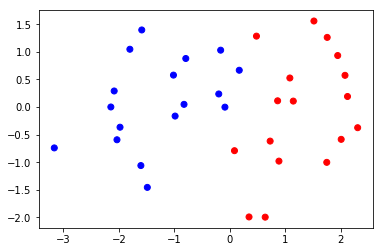

In [30]:
from sklearn.manifold import MDS

G = nx.karate_club_graph()
n = G.number_of_nodes(); # number of nodes

# Obtain the distance matrix D of nodes in G using shortest_path_length()
D = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        D[i][j] = nx.shortest_path_length(G, i,j) 
        
# Run MDS using D with rank k
# Obtain the k features of nodes that prserve the distance
mds = MDS(n_components=2, dissimilarity='precomputed')
X = mds.fit_transform(D);

# Plot the result so that the color of each node indicates the club it belongs to 
plt.scatter(X[:,0], X[:,1], c= node_color_club)

Again, we can run any off-the-shelf classification and clustering methods using the obtained node features. 

# (QUIZ #3) Clustering using Latent Node Features

1. Run K-means with k=2 using the node features X obtaiend by MDS.
2. Visualize the result so that the color of each node indicates the cluster it belongs to.
---------------------------
    sklearn.cluster.KMeans(n_clusters=8)
---------------------------    
* K-Means clustering
* ### Parameters (subset):	
 * n_clusters : int, optional, default: 8. The number of clusters to form as well as the number of centroids to generate.
* ### Attributes (subset):	 
 * labels_ : Labels of each point

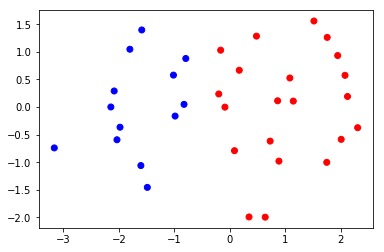

In [31]:
from sklearn.cluster import KMeans

#Run K-means with k=2 using the node features X obtaiend by MDS.
kmeans = KMeans(n_clusters=2).fit(X)

# Visualize the result so that the color of each node indicates the cluster it belongs to.
node_color_clusters = []
for cluster in kmeans.labels_:
    if cluster == 0:
        node_color_clusters.append('red')
    elif cluster == 1:
        node_color_clusters.append('blue')

plt.scatter(X[:,0], X[:,1], c= node_color_clusters)        

Note that the clusters given by KMeans() are very close to the clubs that nodes belong to.

# 4.a Node Classfication: local_and_global_consistency
----------------------

We classify nodes based on network homophily Network homophily refers to the theory in network science which states that, based on node attributes, similar nodes may be more likely to attach to each other than dissimilar ones.

----------------------
    local_and_global_consistency(G, alpha=0.99, max_iter=30, label_name='label')
----------------------
* Node classification by Local and Global Consistency

* ### Parameters:
 1. G (NetworkX Graph)
 2. alpha (float) – Clamping factor
 3. max_iter (int) – Maximum number of iterations allowed
 4. label_name (string) – Name of target labels to predict

* ### Returns:	
 * predicted – Array of predicted labels

* ### Return type:	
 * array, shape = [n_samples]

In [32]:
from networkx.algorithms.node_classification.lgc import local_and_global_consistency

G_train = nx.karate_club_graph()

# target nodes to be classified
nodes_to_test = [1,4,7,10,13,16,19,22,25,28];

#remove the labels of target nodes
for i in nodes_to_test:
    del G_train.nodes[i]['club']

prediction = local_and_global_consistency(G_train, label_name='club')

# graph with the ground truth label
G_test = nx.karate_club_graph()

print("Node " + "\t" + "Prediction" +"\t" + "Answer");
num_correct = 0.0
for i in nodes_to_test:
    print(str(i) + "\t" + prediction[i] +"\t" + G_test.nodes[i]['club']);
    if prediction[i] == G_test.nodes[i]['club']: 
        num_correct += 1
        
print("\n")        
print("Test Error: " + str(num_correct/len(nodes_to_test)))

Node 	Prediction	Answer
1	Mr. Hi	Mr. Hi
4	Mr. Hi	Mr. Hi
7	Mr. Hi	Mr. Hi
10	Mr. Hi	Mr. Hi
13	Officer	Mr. Hi
16	Mr. Hi	Mr. Hi
19	Officer	Mr. Hi
22	Officer	Officer
25	Officer	Officer
28	Officer	Officer


Test Error: 0.8


# (QUIZ #4) Classification using Latent Node Features

1. Run Logistic Regression using the node features X obtaiend by MDS.
2. Report the training error
---------------------------
    sklearn.linear_model.LogisticRegression()
---------------------------    
* Logistic Regression (aka logit, MaxEnt) classifier.
* ### Parameters (subset):
 * solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’). Algorithm to use in the optimization problem.
* ### Methods (subset):	
 * fit(self, X, y[, sample_weight])	Fit the model according to the given training data.
 * predict(self, X)	Predict class labels for samples in X.

In [36]:
from sklearn.linear_model import LogisticRegression

G = nx.karate_club_graph()
n = G.number_of_nodes(); # number of nodes

# Construct labels
y = np.zeros(n)

for i in range(n):
    if G.nodes[i]['club'] == 'Mr. Hi':
        y[i] = 1
    elif G.nodes[i]['club'] == 'Officer':
        y[i] = -1 
    
# Run Logistic Regression using the node features X obtaiend by MDS
clf = LogisticRegression(solver='lbfgs').fit(X, y)
yhat = clf.predict(X)

# Report the training error
num_correct = 0.0
for i in range(n):
    if y[i] == yhat[i]: 
        num_correct += 1
        
print ("Training Error:" + str(num_correct / n));

Training Error:1.0


# 5. Link Prediction 
----------------------

We predict missing links using the Adamic-Adar index. The Adamic-Adarindex between two nodes tends to be high if the nodes are likely to be connected.

----------------------
    adamic_adar_index(G, ebunch=None)
----------------------
* Compute the Adamic-Adar index of all node pairs in ebunch. Adamic-Adar index of u and v is defined as

\begin{equation*}\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{\log |\Gamma(w)|} \end{equation*}

* where \Gamma(u) denotes the set of neighbors of u.

* ### Parameters:	
 1. G (graph) – NetworkX undirected graph.
 2. ebunch (iterable of node pairs, optional (default = None)) – Adamic-Adar index will be computed for each pair of nodes given in the iterable. The pairs must be given as 2-tuples (u, v) where u and v are nodes in the graph. If ebunch is None then all non-existent edges in the graph will be used. Default value: None.
* ### Returns:	
 * piter – An iterator of 3-tuples in the form (u, v, p) where (u, v) is a pair of nodes and p is their Adamic-Adar index.
* ### Return type:	
 * iterator

In [34]:
from networkx.algorithms.node_classification.lgc import local_and_global_consistency

G = nx.karate_club_graph()

edges = list(G.edges().data());

# Remove ten edges
edges_to_remove = set()
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    src = edges[i][0]
    dst = edges[i][1]
    edges_to_remove.add((src, dst))
    G.remove_edge(src,dst)
    print ("Edge (" + str(src) + "," + str(dst) +") is missing!")

# Compute the Adamic-Adar index of all node pairs
scores = list(nx.adamic_adar_index(G))

# Compute the average score of all paris and that of removed edges
score_sum_total = 0.0
score_sum_missing_edges = 0.0

for (src, dst, score) in scores:
    score_sum_total += score
    if (src, dst) in edges_to_remove:
        score_sum_missing_edges += score

print "Average AA-index of missing edges:" + str(score_sum_missing_edges/10)
print "Average AA-index of all pairs:" + str(score_sum_total/len(scores))

Edge (0,6) is missing!
Edge (0,12) is missing!
Edge (0,31) is missing!
Edge (1,17) is missing!
Edge (2,32) is missing!
Edge (2,27) is missing!
Edge (4,10) is missing!
Edge (6,16) is missing!
Edge (13,33) is missing!
Edge (18,32) is missing!
Average AA-index of missing edges:0.520525189361
Average AA-index of all pairs:0.265656154488


Note that the missing edges tend to have higher Adamic-Adar indices than the others.

# References
 1. NetworkX Tutorial (https://networkx.github.io/documentation/stable/tutorial.html)